Accuracy (Random Forest): 0.37


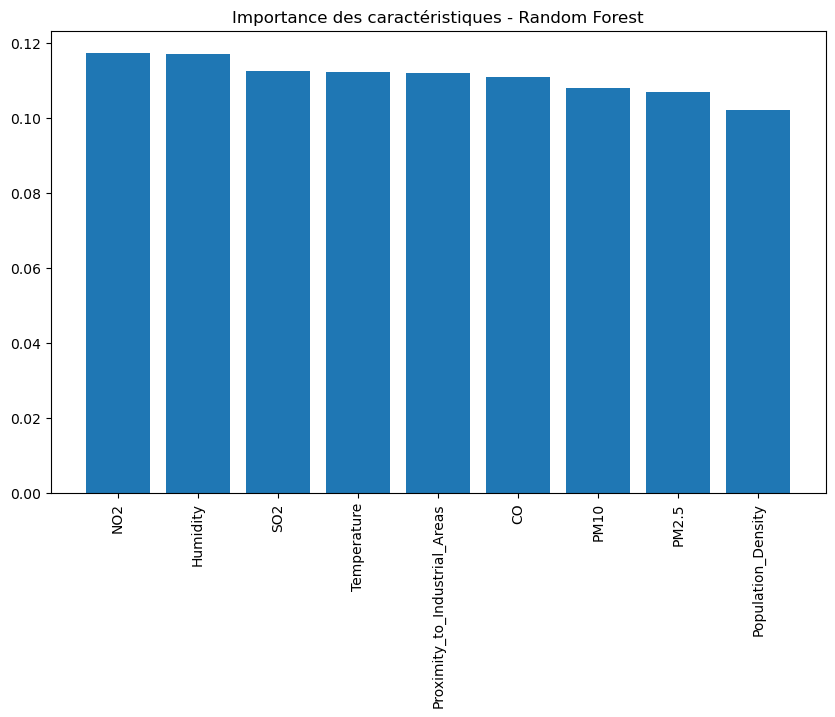

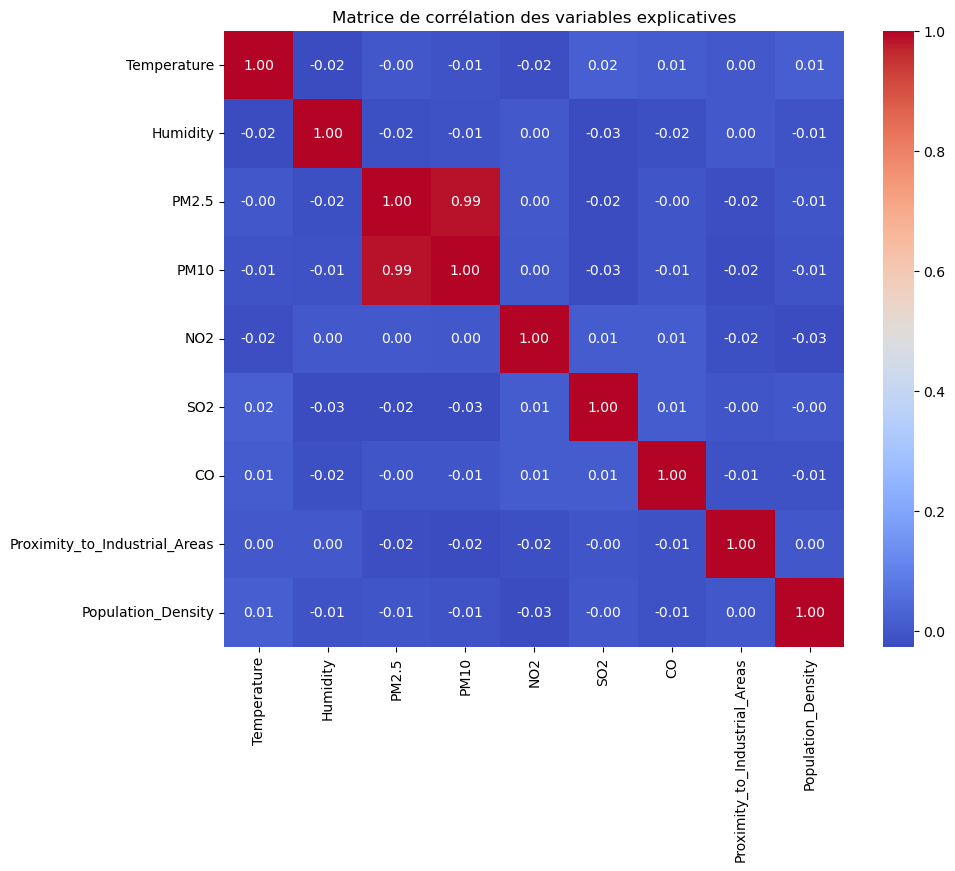

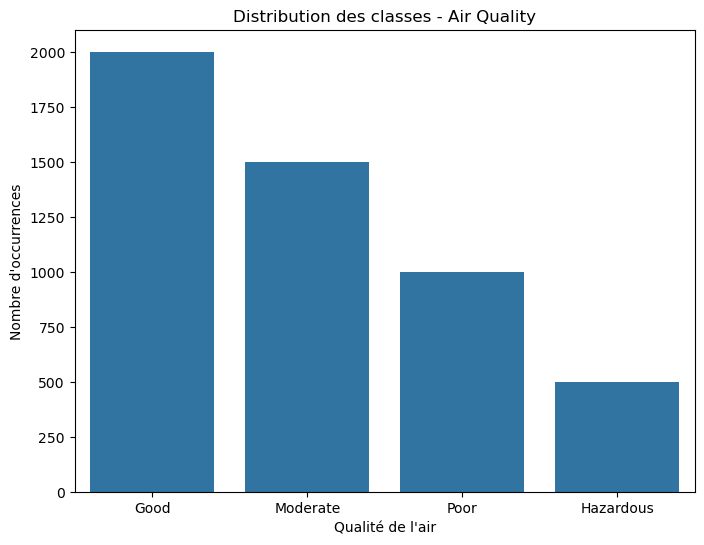

In [83]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement des données
data = pd.read_csv('pollution.csv')

# Préparation des données
X = data.drop(columns=['Air Quality'])  # Variables explicatives
y = data['Air Quality']                # Variable cible

# Encodage de la variable cible
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Modèle Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy:.2f}")

# Visualisation de l'importance des caractéristiques
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title("Importance des caractéristiques - Random Forest")
plt.show()

# Matrice de corrélation
correlation_matrix = data.drop(columns=['Air Quality']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des variables explicatives")
plt.show()

# Distribution des classes de la variable cible
plt.figure(figsize=(8, 6))
sns.countplot(x="Air Quality", data=data, order=data['Air Quality'].value_counts().index)
plt.title("Distribution des classes - Air Quality")
plt.xlabel("Qualité de l'air")
plt.ylabel("Nombre d'occurrences")
plt.show()

In [85]:
from sklearn.ensemble import GradientBoostingClassifier


### Modèle : Gradient Boosting ###
Accuracy (Gradient Boosting): 0.364

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

        Good       0.38      0.79      0.52       591
   Hazardous       0.00      0.00      0.00       152
    Moderate       0.31      0.15      0.21       474
        Poor       0.15      0.02      0.04       283

    accuracy                           0.36      1500
   macro avg       0.21      0.24      0.19      1500
weighted avg       0.28      0.36      0.28      1500



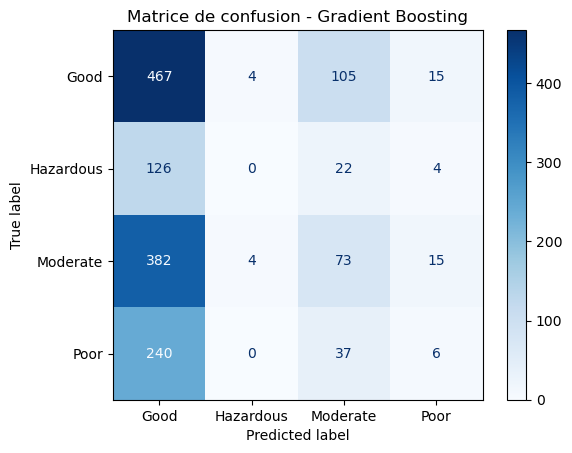

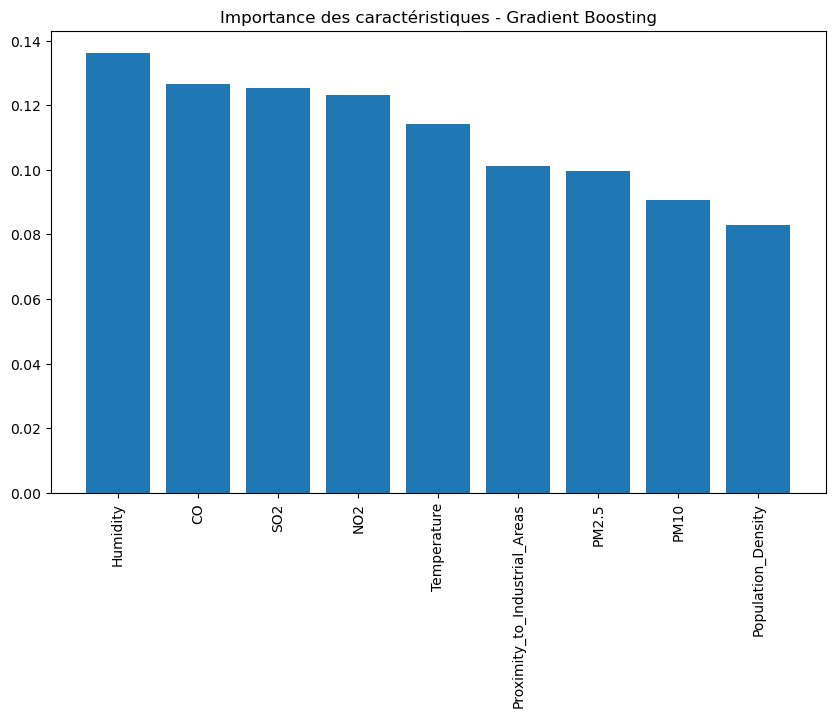

In [89]:
### Modèle 3 : Gradient Boosting
print("\n### Modèle : Gradient Boosting ###")
gbm_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gbm))
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gbm, target_names=label_encoder.classes_))

conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gbm, display_labels=label_encoder.classes_)
disp_gbm.plot(cmap='Blues')
plt.title("Matrice de confusion - Gradient Boosting")
plt.show()

# Importance des caractéristiques
feature_importances_gbm = gbm_model.feature_importances_
sorted_indices_gbm = np.argsort(feature_importances_gbm)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances_gbm[sorted_indices_gbm], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices_gbm], rotation=90)
plt.title("Importance des caractéristiques - Gradient Boosting")
plt.show()